In [90]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import scipy
import pyfar as pf
from matplotlib.ticker import (MultipleLocator)
%matplotlib inline

In [91]:
base_dir = os.getcwd()+"\\out\\"
OUT_DIR = base_dir

### figure formatting

In [92]:
from cycler import cycler
font={
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    "font.size": 11,
}

plt.rcParams.update(font)

plt.rcParams["axes.prop_cycle"] = cycler('color', [ [0, 0.4470, 0.7410],
                                                    [0.8500,0.3250,0.0980],
                                                    [0.9290,0.6940,0.1250],
                                                    [0.4940,0.1840,0.5560],
                                                    [0.4660,0.6740,0.1880],
                                                    [0.3010,0.7450,0.9330],
                                                    [0.6350,0.0780,0.1840],
                                                    [1.0000,0.8390,0.0390],
                                                    [0.3960,0.5090,0.9920],
                                                    [1.0000,0.2700,0.2270],
                                                    [0.,0.6390,0.6390],
                                                    [0.7960,0.5170,0.3640] ])

def create_fig():
    figure,ax = plt.subplots(figsize=(4,2.5))
    plt.grid()
    return figure, ax

def export_fig(fig, filename,out_dir=OUT_DIR, fformat=".pdf"):
    fig.savefig(os.path.join(out_dir+filename+fformat), bbox_inches='tight')

## Infinite plane

In [93]:
# get file from
dat = pd.read_csv(base_dir+"inf_plane_data.csv")
print(dat)

   Unnamed: 0  patch_size   col_raw   col_abs    col_rel      col_rt  \
0           0        50.0  0.069285  1.930715  96.535735   32.554341   
1           1        25.0  0.069285  1.930715  96.535735    0.013136   
2           2        10.0  0.895719  1.104281  55.214044    0.022472   
3           3         5.0  0.901581  1.098419  54.920950    0.057949   
4           4         2.5  1.601516  0.398484  19.924181    0.531924   
5           5         1.0  1.939856  0.060144   3.007180   18.750790   
6           6         0.5  1.984490  0.015510   0.775525  293.957589   

    dif_raw   dif_abs    dif_rel      dif_rt  ...   var_rt_40   var_rt_45  \
0  0.040478  1.959522  97.976095    0.005984  ...    0.004986    0.004987   
1  0.040478  1.959522  97.976095    0.010970  ...    0.010971    0.009973   
2  0.620448  1.379552  68.977615    0.020944  ...    0.020945    0.020938   
3  0.622272  1.377728  68.886388    0.058148  ...    0.062833    0.059890   
4  1.322964  0.677036  33.851792    0.

colocated

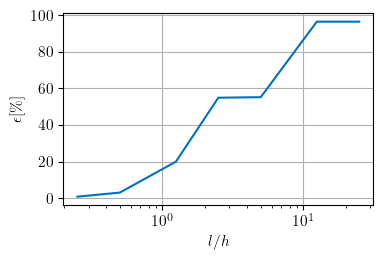

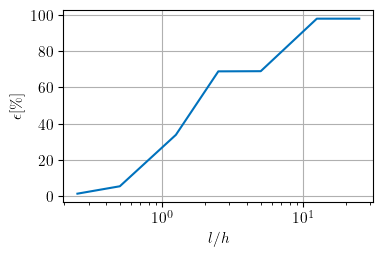

In [94]:
num_patches = (50/dat["patch_size"][:])**2
patch_ratio = dat["patch_size"][:]/2

for code in ["col","dif"]:
# relative error as a function of patch size
    f,a = create_fig()
    plt.semilogx(patch_ratio,dat[code+"_rel"])
    plt.ylabel('$$\epsilon [\%]$$')
    plt.xlabel("$$ l/h $$")
    plt.show()
    export_fig(f,code+"_rel")



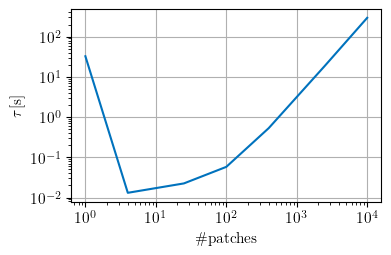

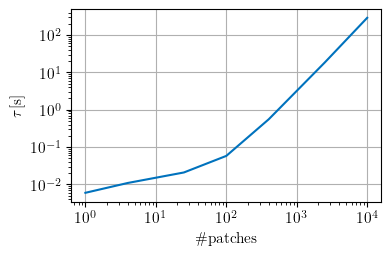

In [95]:
for code in ["col","dif"]:
    # runtime as a function of patch size
    f,a = create_fig()
    plt.loglog(num_patches,dat[code+"_rt"])
    plt.ylabel('$$\\tau [\mathrm{s}]$$')
    plt.xlabel("$$ \mathrm{\# patches}$$")
    plt.show()
    export_fig(f,code+"_rt")

as a function of angle

400.0
2500.0
10000.0


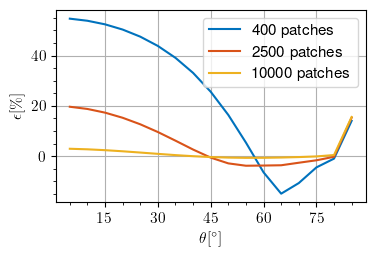

In [96]:

angles = np.arange(5,90,5)
f,a = create_fig()
legend = []
for i,npatches in enumerate(num_patches[4:]):
    data_list = []
    for ang in angles:
        data_list.append(dat["var_rel_"+f'{ang}'][i+3])

    plt.plot(angles,data_list)
    print(npatches)

    legend.append(f'{int(npatches)} patches')

plt.ylabel('$$\epsilon [\%]$$')
plt.xlabel("$$\\theta [^{\circ}]$$")
a.yaxis.set_major_locator(MultipleLocator(20))
a.yaxis.set_major_formatter('$${x:.0f}$$')
a.yaxis.set_minor_locator(MultipleLocator(5))

a.xaxis.set_major_locator(MultipleLocator(15))
a.xaxis.set_major_formatter('$${x:.0f}$$')
a.xaxis.set_minor_locator(MultipleLocator(5))

plt.legend(legend)
plt.show()
export_fig(f,"var_rel")

## diffuse room

In [103]:
# true curve and RT
X = 5
Y = 6
Z = 4
etc_duration = 1.2
max_reflection_order = 150
speed_of_sound = 343.9869
absorption = 0.1

S = (2*X*Y) + (2*X*Z) + (2*Y*Z)
A = S*absorption
alpha_dash = A/S
r_h = 1/4*np.sqrt(A/np.pi)
print(f'reverberation distance is {r_h:.1f}m')
V = X*Y*Z
RT = 24*np.log(10)/(speed_of_sound)*V/(-S*np.log(1-alpha_dash))
print(f'reverberation time is {RT:.2f}s')
E_reverb_analytical = 4/A
t = np.arange(0,1.2,1200)
# Kuttruff Eq 4.7
w_0 = E_reverb_analytical/ V
t_0 = 0.03
# Kuttruff Eq 4.10
reverberation_analytic = w_0 * np.exp(+(
    speed_of_sound*S*np.log(1-alpha_dash)/(4*V))*(t-t_0))
reverberation_analytic = pf.TimeData(reverberation_analytic, t)

reverberation distance is 0.5m
reverberation time is 1.24s


In [104]:
sparrow = pf.io.read(filename=base_dir+"diffuse_room_sparrow.far")
raven = scipy.io.loadmat(file_name=base_dir+"diffuse_room_raven.mat")

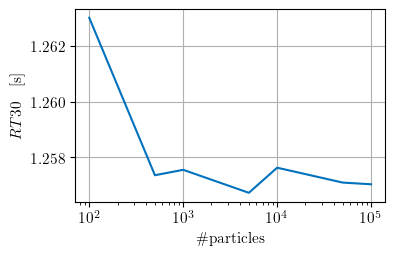

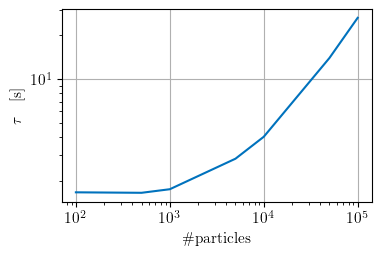

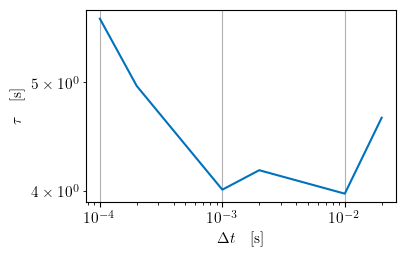

In [105]:
ind=np.where(raven["step_size"].flatten()==.001)
f,a = create_fig()
plt.semilogx(raven["resolution"].flatten()[ind], (raven["RT30"].flatten()[ind]))
plt.ylabel('$$RT30 \quad \mathrm{[s]}$$')
plt.xlabel("$$ \mathrm{\# particles} $$")
plt.show()

f,a = create_fig()
plt.loglog(raven["resolution"].flatten()[ind], (raven["runtime"].flatten()[ind]))
plt.ylabel('$$\\tau \quad \mathrm{[s]}$$')
plt.xlabel("$$ \mathrm{\# particles} $$")
plt.show()


ind=np.where(raven["resolution"].flatten()==10000)
f,a = create_fig()
plt.loglog(raven["step_size"].flatten()[ind], (raven["runtime"].flatten()[ind]))
plt.ylabel('$$\\tau \quad \mathrm{[s]}$$')
plt.xlabel("$$ \Delta t \quad \mathrm{[s]} $$")
plt.show()

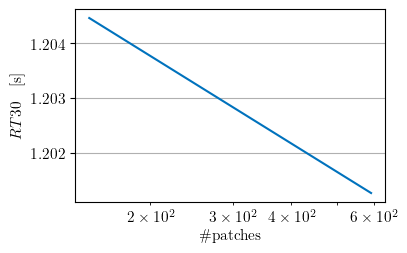

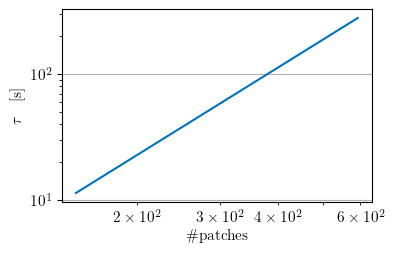

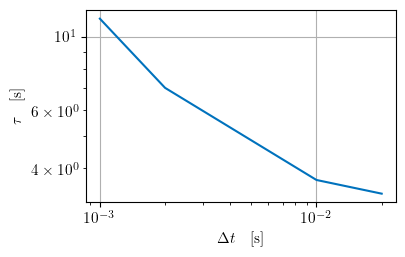

In [106]:
ind=np.where(sparrow["step_size"].flatten()==.001)
f,a = create_fig()
plt.semilogx(sparrow["resolution"].flatten()[ind], (sparrow["RT30"].flatten()[ind]))
plt.ylabel('$$RT30 \quad \mathrm{[s]}$$')
plt.xlabel("$$ \mathrm{\# patches} $$")
plt.show()

f,a = create_fig()
plt.loglog(sparrow["resolution"].flatten()[ind], (sparrow["runtime"].flatten()[ind]))
plt.ylabel('$$\\tau \quad \mathrm{[s]}$$')
plt.xlabel("$$ \mathrm{\# patches} $$")
plt.show()


ind = np.where(sparrow["resolution"].flatten()==148)
f,a = create_fig()
plt.loglog(sparrow["step_size"].flatten()[ind], (sparrow["runtime"].flatten()[ind]))
plt.ylabel('$$\\tau \quad \mathrm{[s]}$$')
plt.xlabel("$$ \Delta t \quad \mathrm{[s]} $$")
plt.show()

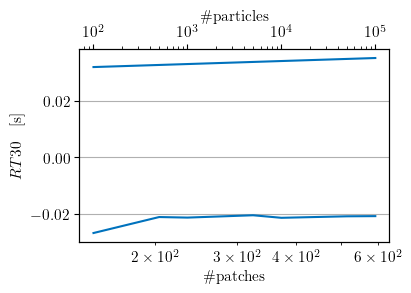

In [107]:
ind=np.where(sparrow["step_size"].flatten()==.001)
f,a = create_fig()
a.semilogx(sparrow["resolution"].flatten()[ind], (RT-sparrow["RT30"].flatten()[ind]))
plt.ylabel('$$RT30 \quad \mathrm{[s]}$$')
plt.xlabel("$$ \mathrm{\# patches} $$")

ind=np.where(raven["step_size"].flatten()==.001)
a2=a.twiny()
a2.semilogx(raven["resolution"].flatten()[ind], (RT-raven["RT30"].flatten()[ind]))
plt.xlabel("$$ \mathrm{\# particles} $$")
plt.show()

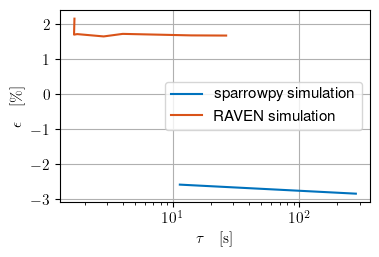

In [112]:
ind=np.where(sparrow["step_size"].flatten()==.001)
f,a = create_fig()
a.semilogx(sparrow["runtime"].flatten()[ind], 100*(sparrow["RT30"].flatten()[ind]-RT)/RT)
plt.ylabel('$$\epsilon \quad \mathrm{[\%]}$$')
plt.xlabel("$$\\tau \quad \mathrm{[s]}$$")

ind=np.where(raven["step_size"].flatten()==.001)
a.semilogx(raven["runtime"].flatten()[ind], 100*(raven["RT30"].flatten()[ind]-RT)/RT)
plt.legend(["sparrowpy simulation","RAVEN simulation"])

plt.show()